In [10]:
import seaborn as sns #Plotting library
import pandas as pd 
import matplotlib.pyplot as plt #We need Matplotlib for setting the labels in the Seaborn graphs
import math
from sklearn.linear_model import LinearRegression #This is the linear regression model from sk-learn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


# Introduction

I selected the speed dating set. I will be predicting decision by partner.

In [14]:
df = pd.read_csv('SpeedDatingData.csv', encoding='ISO-8859-1')
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


# Data cleaning

In [15]:
df.describe()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,...,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,...,7.240312,8.093357,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,...,1.576596,1.610309,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,1.672787,1.717988
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000
25%,154.000000,4.000000,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,...,7.000000,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000
50%,281.000000,8.000000,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.000000,...,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000
75%,407.000000,13.000000,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.000000,...,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000
max,552.000000,22.000000,1.000000,44.000000,2.000000,21.000000,22.000000,22.000000,22.000000,22.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [16]:
df["dec_o"].describe()

count    8378.000000
mean        0.419551
std         0.493515
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: dec_o, dtype: float64

In [17]:
df.dropna()
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [33]:
corr = df.corr()
corr1 = corr["dec_o"]
corr1.nlargest(8)

dec_o      1.000000
match      0.522326
like_o     0.513399
attr_o     0.486885
fun_o      0.414276
shar_o     0.400501
prob_o     0.310299
intel_o    0.216704
Name: dec_o, dtype: float64

I have found the 7 variables with the strongest predictive power, based on correlation. I will use them in my model.

In [34]:
df = df[['dec_o','match','like_o','attr_o', 'fun_o', "shar_o", "prob_o", "intel_o"]]

In [35]:
df.head()

,dec_o,match,like_o,attr_o,fun_o,shar_o,prob_o,intel_o
0,0,0,7.0,6.0,8.0,6.0,4.0,8.0
1,0,0,8.0,7.0,7.0,5.0,4.0,10.0
2,1,1,10.0,10.0,10.0,10.0,10.0,10.0
3,1,1,7.0,7.0,8.0,8.0,7.0,9.0
4,1,1,8.0,8.0,6.0,7.0,6.0,9.0


# Exploratory data analysis

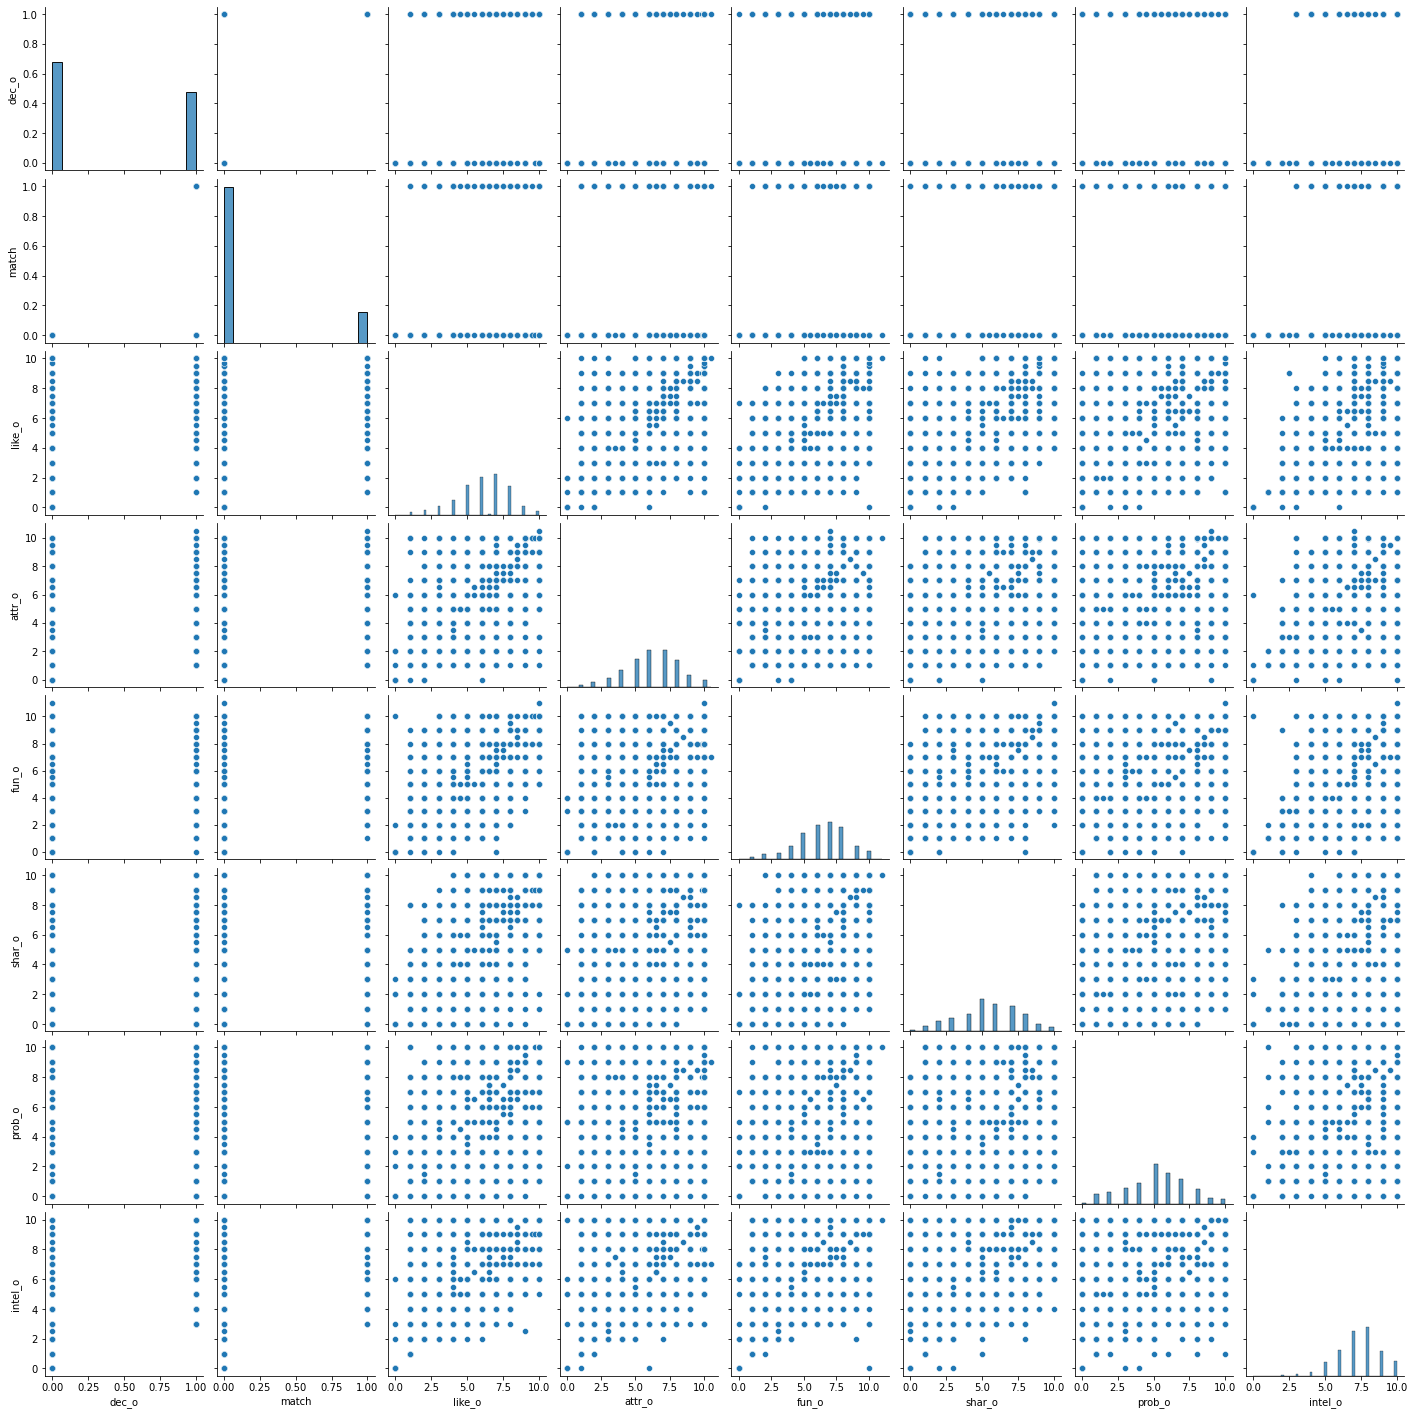

In [36]:
sns.pairplot(df)
plt.show() 

The plots look really cool. I wish I knew what they mean.

In [37]:
corr = df.corr()
corr

,dec_o,match,like_o,attr_o,fun_o,shar_o,prob_o,intel_o
dec_o,1.000000,0.522326,0.513399,0.486885,0.414276,0.400501,0.310299,0.216704
match,0.522326,1.000000,0.305853,0.260837,0.277700,0.270840,0.255574,0.169448
like_o,0.513399,0.305853,1.000000,0.667240,0.691267,0.660448,0.463544,0.509183
attr_o,0.486885,0.260837,0.667240,1.000000,0.586334,0.480048,0.260910,0.390744
fun_o,0.414276,0.277700,0.691267,0.586334,1.000000,0.617995,0.380418,0.494097
shar_o,0.400501,0.270840,0.660448,0.480048,0.617995,1.000000,0.468130,0.400031
prob_o,0.310299,0.255574,0.463544,0.260910,0.380418,0.468130,1.000000,0.263503
intel_o,0.216704,0.169448,0.509183,0.390744,0.494097,0.400031,0.263503,1.000000


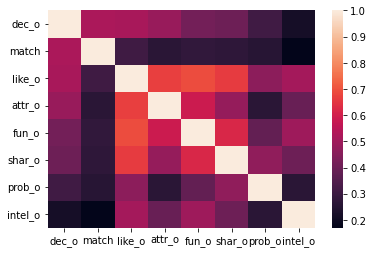

In [38]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns) 
plt.show()

In [45]:
df = df.dropna()

The highest correlations are between how much the partner likes the person, and how attractive and fun they think they are, and whether they have shared hobbies.

# Predictive model

I will be using Random Forest. Random forest builds decision trees on different samples of the data, and then takes the majority vote for the final result. I will be using Random Forest Classifier, since the dependent variable isn't continuous. 

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = df.drop(["dec_o"], axis=1)
y = df["dec_o"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(random_state=1, n_estimators=100) 
rf = rf.fit(X_train, y_train)

In [47]:
y_pred = rf.predict(X_test)

In [48]:
rf.score(X_test,y_test)

0.8034547152194211

In [49]:
math.sqrt(mean_squared_error(y_test, y_pred))

0.44333428107984035

# Evaluation

In [53]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred) #creates a "confusion matrix"
cm

array([[974, 193],
       [228, 747]])

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1167
           1       0.79      0.77      0.78       975

    accuracy                           0.80      2142
   macro avg       0.80      0.80      0.80      2142
weighted avg       0.80      0.80      0.80      2142



In [58]:
rf.score(X_test,y_test)

0.8034547152194211

In [59]:
math.sqrt(mean_squared_error(y_test, y_pred))

0.44333428107984035

The r2 score of the model means that the model is 80% more accurate than the average value of a data set over time.

The RMSE shows that the model is usually 0,44 off when predicting the decision by partner.

The recall for the negative decision by the partner is 0.83, which means that the model cathes 83% of those cases. The model catches 77% of the cases where the decision is positive.

The numbers for the precision are similar. I am 81% precise when calling the negative decisions negative, and 79% precise when calling the positive decision positive.

# Conclusion

The model is not perfect, but it's able to predict the decision by partner with some accuracy. The model does not catch 23% of the cases where the decision is positive. This should be improved, because a model which is inaccurate for almost a quarter of the cases is not very useful.